In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import daft
import matplotlib.pyplot as plt
output = "D:\\DATA\\dataset\\atlas\\data.parquet"
#aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
data=daft.read_parquet(output)
    

In [7]:
data.column_names

['grid_cell',
 'cloud_cover',
 'parquet_url_img',
 'parquet_url_dem',
 'parquet_row_dem',
 'parquet_row_img',
 'img_thumb',
 'B04',
 'B03',
 'B02',
 'cloud_mask',
 'dem_thumb',
 'DEM',
 'compressed']

In [8]:
import daft.functions.image as fi

data.with_column("img_thumb", fi.decode_image(data["img_thumb"])).show()

🗡️ 🐟 Parquet Scan: 00:00 

🗡️ 🐟 Limit 10: 00:00 

🗡️ 🐟 Sample: 00:00 

RuntimeStatsManager finished with active nodes {1}


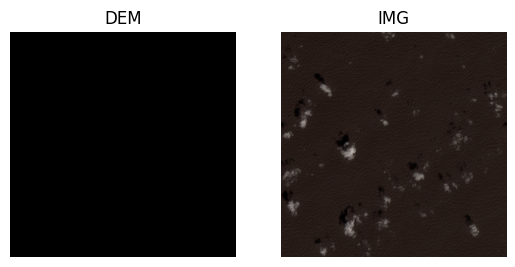

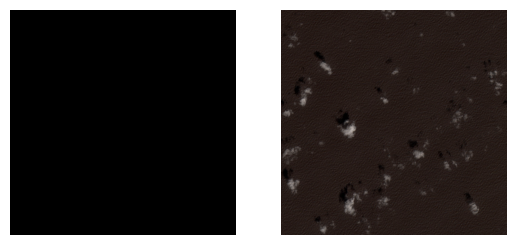

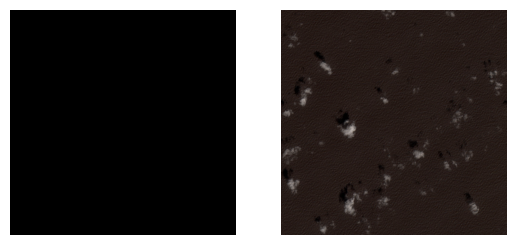

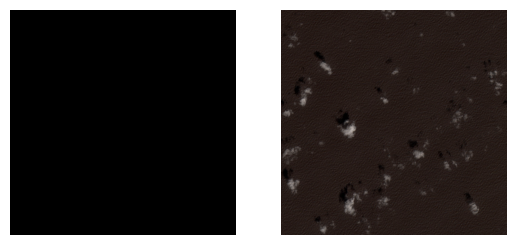

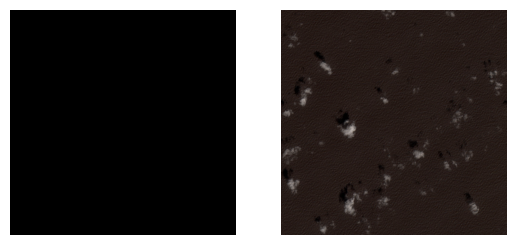

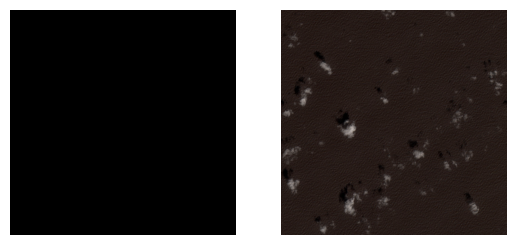

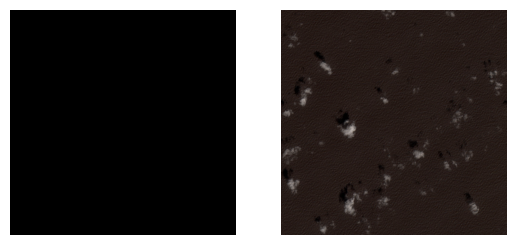

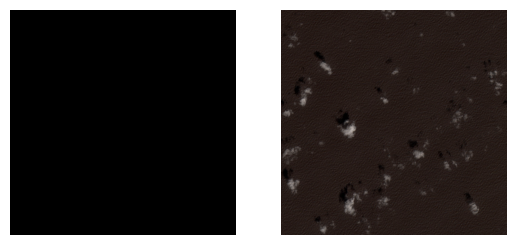

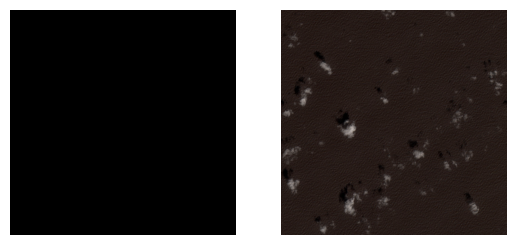

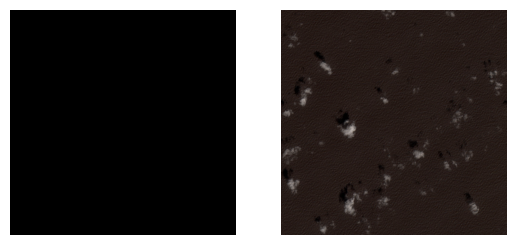

In [9]:
import math
from rasterio.io import MemoryFile

size=10
row=data.sample(0.1).limit(size).to_pydict()
for i in range(size):
    fig,axs=plt.subplots(1,2)
    with MemoryFile(row['DEM'][0]) as mem_f:
        with mem_f.open(driver='GTiff') as f:
            dem = f.read()
    dem=dem.reshape(356,356)
    axs[0].imshow(dem, cmap='gray')
    if i == 0:
        axs[0].set_title("DEM")
    axs[0].set_axis_off()
    dimg=np.frombuffer(row["img_thumb"][0], dtype='uint8')
    img = cv.imdecode(dimg, cv.IMREAD_ANYCOLOR)
    axs[1].imshow(img)
    axs[1].set_axis_off()
    if i == 0:
        axs[1].set_title("IMG")
    plt.show()

Doing 1
Features: 55, Total pixels: 158490
[ 1278   294  1851 80097  5361   348  2601   324   285  1590  1104   729
   390   507   270  1560   288  1539   639   474   381   303   969   507
   375   426   534   327   249  1530  5991  1644  7914   489  4461   246
 11316  5970  5664  1005   465   612   387   321   501   249   393   777
   333   366   666   441   522   393   234]
Features: 55, Total pixels: 158490
[ 1278   294  1851 80097  5361   348  2601   324   285  1590  1104   729
   390   507   270  1560   288  1539   639   474   381   303   969   507
   375   426   534   327   249  1530  5991  1644  7914   489  4461   246
 11316  5970  5664  1005   465   612   387   321   501   249   393   777
   333   366   666   441   522   393   234]


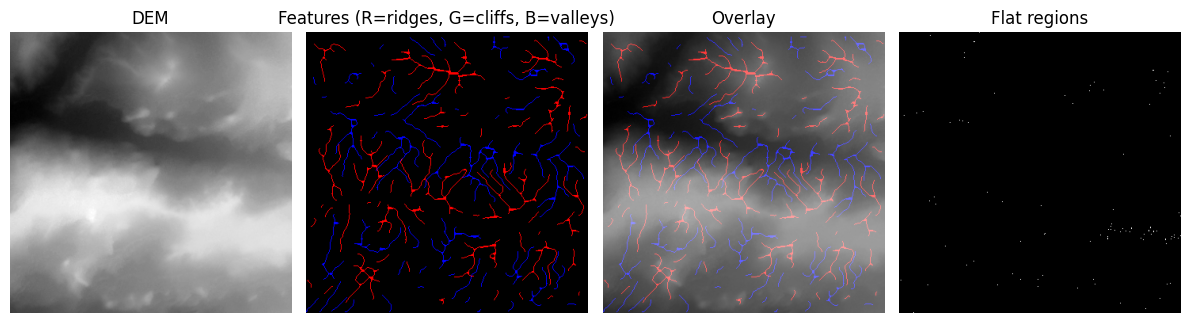

Doing 2
Features: 7, Total pixels: 194247
[189111    633   1302   1152    804    624    621]
Features: 7, Total pixels: 194247
[189111    633   1302   1152    804    624    621]


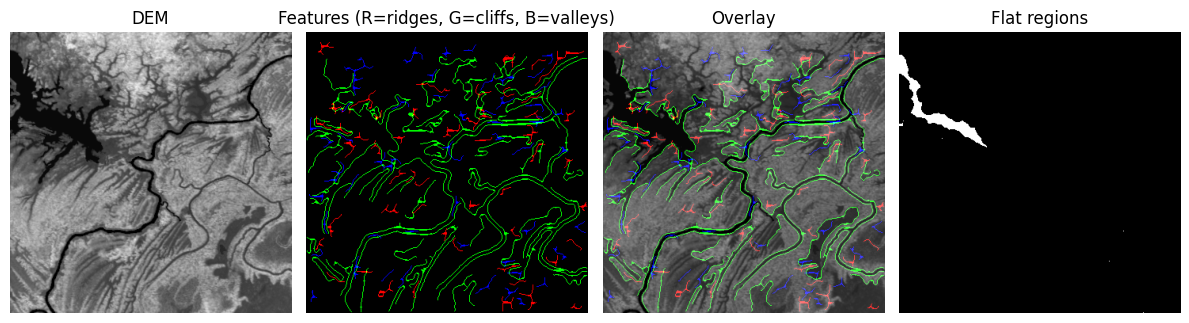

Doing 3
Features: 20, Total pixels: 141672
[ 9402 45171  1980  5247  7035   777  1323   588   564   882   504   837
  1386   519   738   543 60981  1341   498  1356]
Features: 20, Total pixels: 141672
[ 9402 45171  1980  5247  7035   777  1323   588   564   882   504   837
  1386   519   738   543 60981  1341   498  1356]


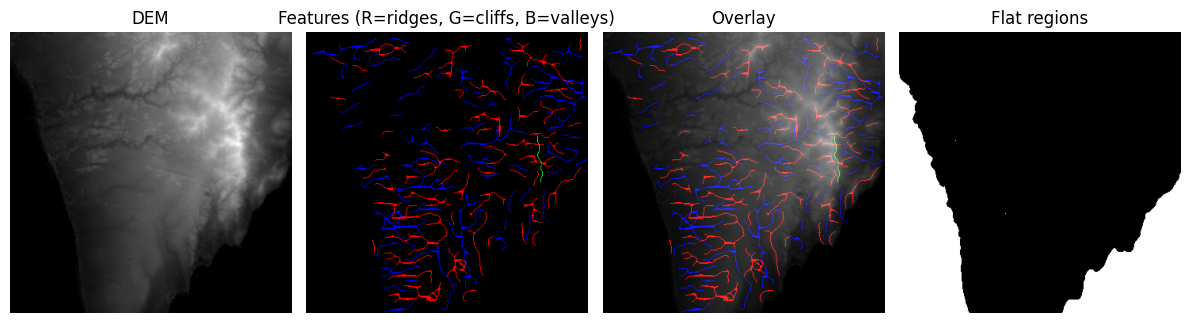

Doing 4
Features: 42, Total pixels: 118683
[25863  1728  3531  1095  9978   762  3708   687  1248   939  2337  1611
   741   789  9990  5286   813  2565  1968   705 12273   768   594   648
   768   720  1656  1185  2469   585   771  1086  1077  4497  2985   969
   810  1992  2877   756  2175   678]
Features: 42, Total pixels: 118683
[25863  1728  3531  1095  9978   762  3708   687  1248   939  2337  1611
   741   789  9990  5286   813  2565  1968   705 12273   768   594   648
   768   720  1656  1185  2469   585   771  1086  1077  4497  2985   969
   810  1992  2877   756  2175   678]


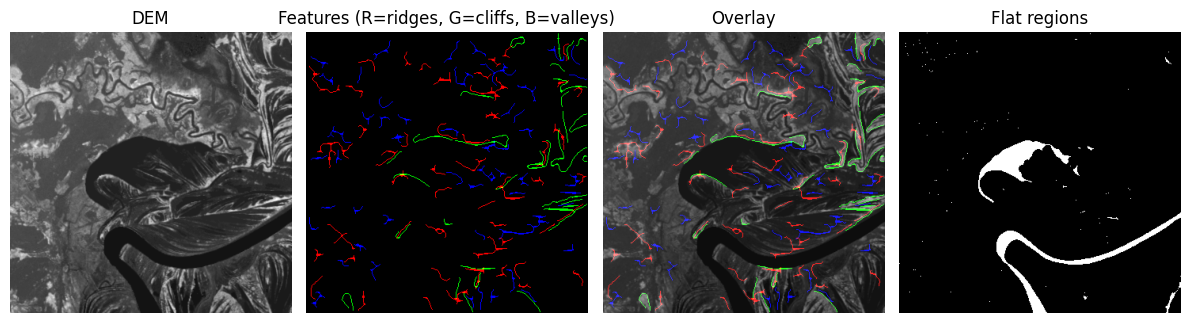

Doing 5
Doing 6
Features: 32, Total pixels: 156795
[11547  1161   813   726  1116  3456   612  1161   981  1218  1584  1062
  1815  4059   786  1209  1413  1167   639 29925  1152 71970   393   897
  1572   954   855  1230  6834  2934   810   744]
Features: 32, Total pixels: 156795
[11547  1161   813   726  1116  3456   612  1161   981  1218  1584  1062
  1815  4059   786  1209  1413  1167   639 29925  1152 71970   393   897
  1572   954   855  1230  6834  2934   810   744]


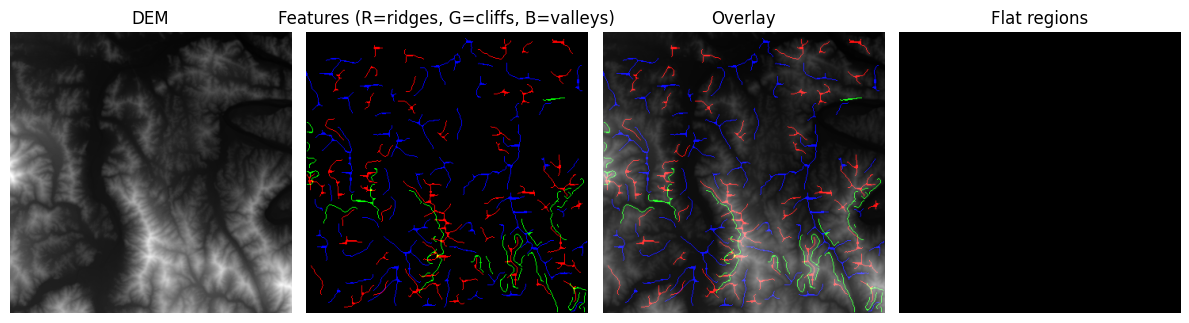

Doing 7
Features: 30, Total pixels: 151113
[78297 10785   780  1146  1206  1830   522  1104   978  1773   489   939
   807   504  1233   615  1899 16863  2580   648   723 12528  1038   600
  1344   915  2724  2715  2808   720]
Features: 30, Total pixels: 151113
[78297 10785   780  1146  1206  1830   522  1104   978  1773   489   939
   807   504  1233   615  1899 16863  2580   648   723 12528  1038   600
  1344   915  2724  2715  2808   720]


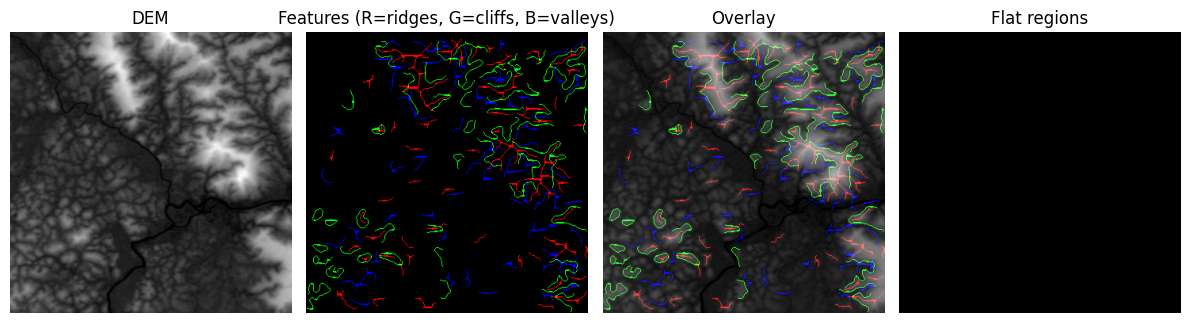

Doing 8
Features: 43, Total pixels: 168804
[   567    891   2253   1089    411 107595   2022    351    306   1068
    600   2118    342    168    141    612   7791    231    384   1071
  20148    483    534    246   5574    267   1845    210    168    309
    267    390    651    366   1995    759   1188   1701    564    666
    228    150     84]
Features: 43, Total pixels: 168804
[   567    891   2253   1089    411 107595   2022    351    306   1068
    600   2118    342    168    141    612   7791    231    384   1071
  20148    483    534    246   5574    267   1845    210    168    309
    267    390    651    366   1995    759   1188   1701    564    666
    228    150     84]


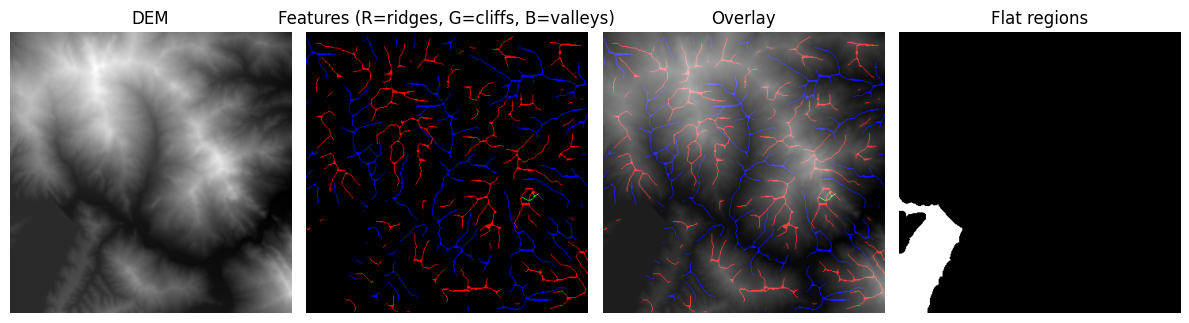

Doing 9
Features: 41, Total pixels: 157299
[16458   663   693  5667  8202  6039 37914   864  5295   852   525   903
  2325   939  1149  3441  3927  1164  1020   684  3396   681 15519 14640
  1086  1263   741   756  2883  3669  1350  1317   864   939  1713  1212
  2640   741  1911   684   570]
Features: 41, Total pixels: 157299
[16458   663   693  5667  8202  6039 37914   864  5295   852   525   903
  2325   939  1149  3441  3927  1164  1020   684  3396   681 15519 14640
  1086  1263   741   756  2883  3669  1350  1317   864   939  1713  1212
  2640   741  1911   684   570]


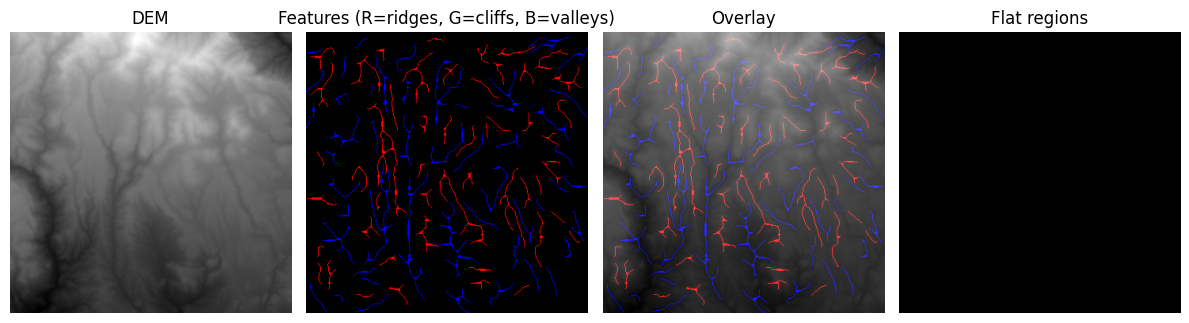

In [81]:
import richdem as rd
from skimage import feature,filters
from scipy import ndimage
from skimage.morphology import skeletonize
from skan.csr import skeleton_to_csgraph, Skeleton, summarize

def num_features(m):
    m=m*255
    m=ndimage.gaussian_filter(m, sigma=0.7)
    m=m>0

    labeled_array, num_features = ndimage.label(m,structure=ndimage.generate_binary_structure(m.ndim,2))
    pixel_counts = np.bincount(labeled_array.ravel())
    feature_pixel_counts = pixel_counts[1:]
    return num_features, feature_pixel_counts

def clean(m, min_length=50, max_features=3, max_total_pixels=None):
    """
    Clean a binary skeleton image by removing short terminal branches
    and keeping only the largest connected components.
    
    Parameters:
        m: Binary image to clean
        min_length: Minimum branch length to keep (in pixels)
        max_features: Maximum number of features to keep
        max_total_pixels: If set, will thin out features until below this pixel count
    
    Returns:
        Cleaned skeleton image
    """
    m = m > 0
    if not np.any(m):
        return m
    
    m = skeletonize(m)
    current_skeleton_image = m.copy()
    
    escape_hatch=0
    max_iterations=5000
    prev_pixel_count = None
    no_progress_count = 0
    
    while True:
        escape_hatch+=1
        if escape_hatch>max_iterations:
            break
        
        # Skip if empty
        if not np.any(current_skeleton_image):
            break
        
        # Check for progress - if pixel count hasn't changed for several iterations, break
        current_pixel_count = np.sum(current_skeleton_image)
        if prev_pixel_count is not None and current_pixel_count == prev_pixel_count:
            no_progress_count += 1
            if no_progress_count > 5:
                break
        else:
            no_progress_count = 0
        prev_pixel_count = current_pixel_count
            
        try:
            skel = Skeleton(current_skeleton_image)
            branch_df = summarize(skel,separator="-")
        except ValueError:
            break
        
        if branch_df.empty:
            break
        
        # Get column names dynamically (skan versions differ)
        cols = branch_df.columns.tolist()
        node_src_col = 'node-id-src' if 'node-id-src' in cols else 'node_id_src'
        node_dst_col = 'node-id-dst' if 'node-id-dst' in cols else 'node_id_dst'
        branch_dist_col = 'branch-distance' if 'branch-distance' in cols else 'branch_distance'
            
        # Get the degree of each node (junctions and endpoints)
        degrees = skel.degrees
        
        # Identify terminal branches (connected to an endpoint with degree 1)
        is_terminal_src = degrees[branch_df[node_src_col].astype(int)] == 1
        is_terminal_dst = degrees[branch_df[node_dst_col].astype(int)] == 1
        is_terminal_branch = is_terminal_src | is_terminal_dst
        
        # Identify short, terminal branches
        short_branches = branch_df[branch_dist_col] < min_length
        branches_to_remove_mask = short_branches & is_terminal_branch
        
        if not branches_to_remove_mask.any():
            break
            
        # Collect the pixel IDs for the branches to remove
        pixels_to_remove_ids = []
        for idx in branch_df.index[branches_to_remove_mask]:
            pixels_to_remove_ids.extend(skel.path(idx))
        
        # Remove the pixels from the skeleton image
        if pixels_to_remove_ids:
            current_skeleton_image.flat[pixels_to_remove_ids] = False
    
    # Keep only the largest connected components
    if np.any(current_skeleton_image):
        labeled_array, n_features = ndimage.label(current_skeleton_image, 
                                                   structure=ndimage.generate_binary_structure(2, 2))
        if n_features > max_features:
            pixel_counts = np.bincount(labeled_array.ravel())
            # Ignore background (index 0)
            pixel_counts[0] = 0
            # Get indices of largest components
            largest_labels = np.argsort(pixel_counts)[-max_features:]
            # Create mask keeping only largest components
            mask = np.isin(labeled_array, largest_labels)
            current_skeleton_image = current_skeleton_image & mask
        
        # If max_total_pixels is set, further reduce to meet target
        if max_total_pixels is not None and np.sum(current_skeleton_image) > max_total_pixels:
            labeled_array, n_features = ndimage.label(current_skeleton_image, 
                                                       structure=ndimage.generate_binary_structure(2, 2))
            pixel_counts = np.bincount(labeled_array.ravel())
            pixel_counts[0] = 0
            # Sort by size (largest first)
            sorted_labels = np.argsort(pixel_counts)[::-1]
            cumsum = 0
            keep_labels = []
            for label in sorted_labels:
                if pixel_counts[label] == 0:
                    continue
                if cumsum + pixel_counts[label] <= max_total_pixels:
                    cumsum += pixel_counts[label]
                    keep_labels.append(label)
                if len(keep_labels) >= max_features:
                    break
            if keep_labels:
                mask = np.isin(labeled_array, keep_labels)
                current_skeleton_image = current_skeleton_image & mask
             
    return current_skeleton_image


def skeleton(m, blur_sigma=2):
    m = ndimage.gaussian_filter(m*15, sigma=blur_sigma)+m
    m = skeletonize(m)
    return m

def process_flow(flow, high_percentile=99.5, low_percentile=95, blur_sigma=1.5):
    """Process flow accumulation with stricter thresholds for fewer features."""
    high_thresh = np.percentile(flow, high_percentile)
    low_thresh = np.percentile(flow, low_percentile)
    hysteresis_binary = filters.apply_hysteresis_threshold(flow, low=low_thresh, high=high_thresh)
    return hysteresis_binary

def get_maps(dem, dem_size=30, canny_sigma=1.5, blur_sigma=1.5, slope_threshold_steep=20.0, 
             slope_threshold_flat=2.0, high_percentile=99.7, low_percentile=99, 
             min_branch_length=100, max_features=2, max_total_pixels=5000,line_sigma=1.5):
    cell_size=dem_size/dem.shape[1]
    geotr=(0.0, cell_size, 0.0, 0.0, 0.0, -cell_size)
    dem=dem.reshape(dem.shape[1],dem.shape[1])
    dem = ndimage.gaussian_filter(dem, sigma=blur_sigma)
    dem_inv=dem.max()-dem
    dem = rd.rdarray(dem, no_data=0)
    dem.geotransform = geotr
    dem_inv = rd.rdarray(dem_inv, no_data=0)
    dem_inv.geotransform = geotr

    flow = rd.FlowAccumulation(dem, method='D8')
    flow_inv = rd.FlowAccumulation(dem_inv, method='D8')
    
    valleys = process_flow(flow, high_percentile, low_percentile)
    valleys = skeleton(valleys)
    valleys = clean(valleys, min_length=min_branch_length, max_features=max_features, 
                    max_total_pixels=max_total_pixels)
    valleys = ndimage.gaussian_filter(valleys*5, sigma=line_sigma)+valleys
    
    ridges = process_flow(flow_inv, high_percentile, low_percentile)
    ridges = skeleton(ridges)
    ridges = clean(ridges, min_length=min_branch_length, max_features=max_features,
                   max_total_pixels=max_total_pixels)
    ridges = ndimage.gaussian_filter(ridges*5, sigma=line_sigma)+ridges
    
    slope = rd.TerrainAttribute(dem, attrib='slope_degrees')
    flat_regions = (slope < slope_threshold_flat)
    steep_terrain = (slope > slope_threshold_steep)
    dem_norm=dem/dem.max()
    cliff_edges = feature.canny(dem_norm, sigma=canny_sigma)
    cliff_edges = (cliff_edges & steep_terrain)
    # cliff_edges = skeleton(cliff_edges)
    # Also clean and limit cliff edges
    cliff_edges = clean(cliff_edges, min_length=min_branch_length, max_features=max_features,
                        max_total_pixels=max_total_pixels)
    cliff_edges = ndimage.gaussian_filter(cliff_edges*5, sigma=line_sigma)+cliff_edges
    
    return valleys, ridges, cliff_edges, flat_regions


def get_map_combined(dem, dem_size=30, canny_sigma=1.5, blur_sigma=1.5, slope_threshold_steep=20.0, 
                     slope_threshold_flat=2.0, high_percentile=99.7, low_percentile=99.0,
                     min_branch_length=100, max_features=1, max_total_pixels=3000,line_sigma=1.5):
    valleys, ridges, cliff, flat_regions = get_maps(
        dem, dem_size=dem_size, canny_sigma=canny_sigma, blur_sigma=blur_sigma,
        slope_threshold_steep=slope_threshold_steep, slope_threshold_flat=slope_threshold_flat,
        high_percentile=high_percentile, low_percentile=int(low_percentile),
        min_branch_length=min_branch_length, max_features=max_features,
        max_total_pixels=max_total_pixels
    )
    
    map_combined=np.zeros((dem.shape[0], dem.shape[1], 3))
    valleys=valleys>0
    ridges=ridges>0
    cliff=cliff>0
    map_combined[:,:,2]=valleys
    map_combined[:,:,0]=ridges
    map_combined[:,:,1]=cliff
    return map_combined, flat_regions

vis=True
for i in range(1,size):
    print("Doing "+str(i))
    with MemoryFile(row['DEM'][i]) as mem_f:
        with mem_f.open(driver='GTiff') as f:
            dem = f.read()
    dem=dem.reshape(dem.shape[1],dem.shape[1])
    if dem.max()==0:
        continue
    
    combined,flat_regions = get_map_combined(dem, high_percentile=98, low_percentile=90.0, 
                                 min_branch_length=10000, max_features=50, 
                                 max_total_pixels=1000000,line_sigma=2.5,blur_sigma=1.2)
    n_feat, pixel_counts = num_features(combined)
    total_pixels = sum(pixel_counts) if len(pixel_counts) > 0 else 0
    print(f"Features: {n_feat}, Total pixels: {total_pixels}")
    print(pixel_counts)
    if vis:
        plt.figure(figsize=(12,4))
        plt.subplot(1,4,1)
        plt.imshow(dem, cmap='gray')
        plt.title("DEM")
        plt.axis('off')
        
        plt.subplot(1,4,2)
        plt.imshow(combined)
        plt.title("Features (R=ridges, G=cliffs, B=valleys)")
        plt.axis('off')
    
    dem_vis = dem - dem.min()
    coldem = np.stack([((dem_vis*255)/dem_vis.max())*0.7] * 3, axis=2).astype(np.uint8)
    coldem = np.maximum(coldem, (combined*255).astype(np.uint8))
    if vis:
        plt.subplot(1,4,3)
        plt.imshow(coldem)
        plt.title("Overlay")
        plt.axis('off')

        plt.subplot(1,4,4)
        plt.imshow(flat_regions, cmap='gray')
        plt.title("Flat regions")
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()

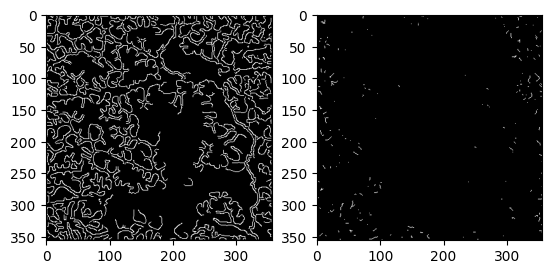

In [ ]:
import richdem as rd
from skimage import feature

with MemoryFile(row['DEM'][0]) as mem_f:
    with mem_f.open(driver='GTiff') as f:
        dem = f.read()

flow_threshold_percent=0.1
patch_size=30 #in meters
cell_size=patch_size/dem.shape[1]
geotr=(0.0, cell_size, 0.0, 0.0, 0.0, -cell_size)
dem=dem.reshape(dem.shape[1],dem.shape[1])
dem=dem.max()-dem
array = rd.rdarray(dem, no_data=0, meta_obj={
    'geotransform': geotr
})
array.geotransform=geotr
rd.FillDepressions(array, in_place=True)

flow_accumulation_valleys = rd.FlowAccumulation(array, method='D8')

max_flow = np.max(flow_accumulation_valleys[flow_accumulation_valleys != array.no_data])
flow_threshold_valleys = max_flow * flow_threshold_percent
valleys_sketch = (flow_accumulation_valleys > flow_threshold_valleys).astype(np.uint8)

cliff=feature.canny((array - array.min()) / (array.max() - array.min()), sigma=1.0,
                                  low_threshold=0.1,
                                  high_threshold=0.2).astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(cliff, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(valleys_sketch, cmap='gray')
plt.show()